# Hypothesis Testing

In [2]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env

### Setup plot default parameters

In [3]:
plt.rc('figure', figsize=(16,9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=16)

np.random.seed(13)

## Simulation Based Approach
__Example__: Codeup produced a scratch off lottery ticket called "Golden Gitty-Up". The odds of winning are advertised to the state of Texas.
> If Codeup produced the tickets they know how many tickets are 'winners' and how many are 'losers'

__Theory__: Our `population` is 1,000 tickets.

__Implementation__: Model the win/loss ratio using pandas Series
- 250 tickets -> Win
- 750 tickets -> Loss
- 25% chance of a 'Win' ticket
- 1 in 4 chance of a 'Win' ticket

The actual probability of winning is 25%


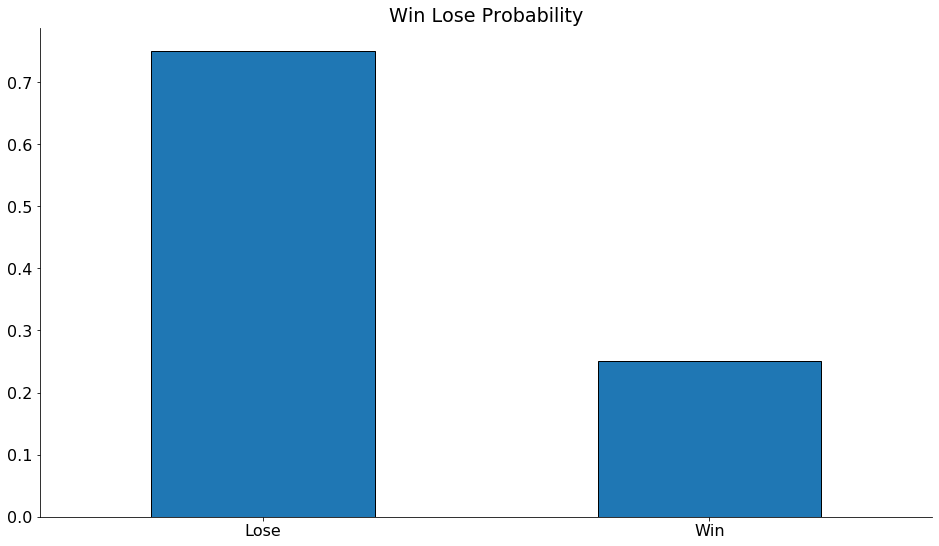

In [33]:
# generate a series of 1000 tickets reflecting the win-loss probability of a Golden Gitty-Up
tickets = pd.Series([True] * 250 + [False] * 750)

# Visualize the win loss probability
tickets.value_counts(normalize=True).set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)

print('The actual probability of winning is {:.0%}'.format(tickets.mean()))
plt.title('Win Lose Probability');

__Scenario__:

The "Golden Gitty-Ups" were distributed to the town of Bronte, Texas, population 999. Jack Kerouac is dropped into town, receiving the last ticket.

__Theory__:

Take a random `sample` [__BORING__ Google Talk] and calculate the win rate.
> We won't see a win-rate of exactly 25% for each sample. A sample is a piece of the population. A piece of the glory.

__Implementation__:

Use `pd.sample` to randomly choose 25 tickets, representing 25 Brontenites. Use `pd.mean` to calculate win rate of the sample.

In [250]:
# A sample for population is 25 citizens. 25 out of 1,000 represents our sample.
citizens = 25
sample_mean = tickets.sample(citizens).mean()

print("Sample mean win-rate {:.2%}".format(sample_mean))

Sample mean win-rate 24.00%


__Scenario__:

Each citizen in Bronte, Texas in is given a "Golden Gitty-Up".

__Theory__:

Each street is a portion of the population, 25 citizens each. The win rate, again, will not be exactly 25%.

__Implementation__:

Let's take a sample of one street.

In [38]:
# this is a list comprehension that takes 5 random samples of 25 tickets.
[tickets.sample(citizens).mean() for _ in range(5)]

[0.32, 0.2, 0.4, 0.16, 0.32]

__Theory__:

Let's repeat this experiment 10,000 times.
> Win rates are expected to be normally distributed.

__Implementation__:

Simulate 10,000 win-loss probabilities of a sample of our population.

Average win-loss probability of 10,000 trials 24.92%


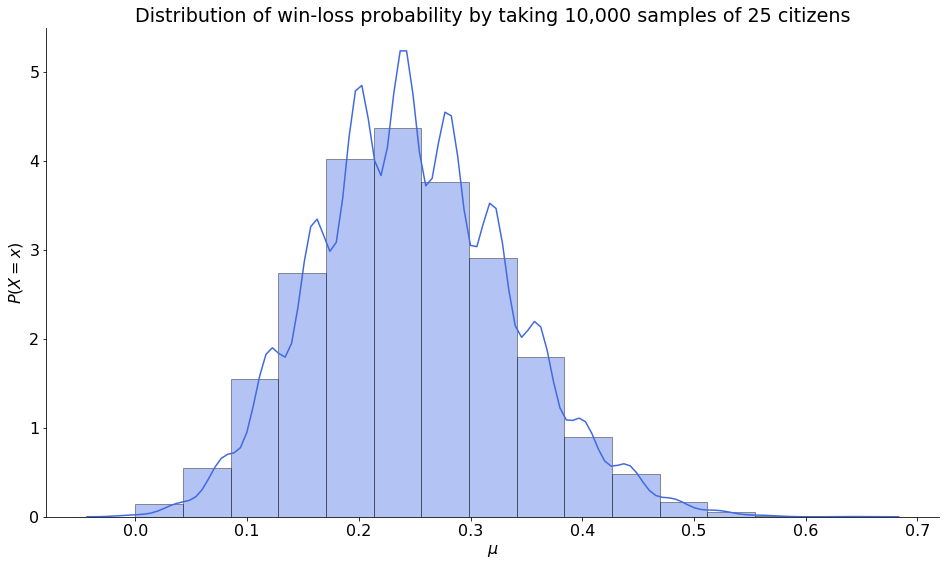

In [249]:
# I can use `stats.binom` to simulate wins = 1 and losses = 0. I can set `p` kwarg to .25 -> The probability of
# winning.
win_loss_rates = stats.binom(n=1, p= 0.25).rvs((10_000, 25))
average_win_rate = win_loss_rates.mean()

# Calcalate and plot the mean win rate for 10,000 trials.
sns.distplot(win_loss_rates.mean(axis=1), bins=15, color='RoyalBlue')
print("Average win-loss probability of 10,000 trials {:.2%}".format(average_win_rate))

plt.title("Distribution of win-loss probability by taking 10,000 samples of 25 citizens")
plt.xlabel('$\mu$')
plt.ylabel('$P(X=x)$');

In [64]:
# simulation of 10,000 win-loss probabilities

# Inside pd.Series, tickets.sample(citizens).mean() calculates the mean win rate of a single
# sample/simulation. 'for _ in range(10_000)' simulates 10,000 samples of a street's win-rate.
# calculated_winrates = pd.Series([tickets.sample(citizens).mean() for _ in range(10_000)])

# sns.distplot(calculated_winrates,bins=15)
# plt.title("Win-rate distribution of taking 10,000 samples from 25 citizens");

## Mini Exercise -- Central Limit Theory


## 1.
>Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.

In [290]:
# In order to create a matrix of all possible outcomes from rolling a pair of dice
# I'll need to use Numpy and broadcast the combinations into a matrix.
die_1 = np.array([1,2,3,4,5,6]).reshape(-1, 1) # reshape
die_2 = np.array([1,2,3,4,5,6])

# Add vectors together to generate a Numpy array.
dice = die_1 + die_2
number_of_outcome = 36

theo_expected_value = (dice * probability).sum()
print("The expected value for the average of 6 dice rolls is {:.2f}".format(theo_expected_value))

The expected value for the average of 6 dice rolls is 7.00


In [291]:
# Create a pandas dataframe to relabel index and columns to the outcomes of a die -> 1-6
dice_outcomes = pd.DataFrame(
    dice,
    index=np.arange(1,7),
    columns=np.arange(1,7)
)

# Create a probability table of rolling a certain outcome
dice_probability = pd.DataFrame(
    dice_outcomes.stack().value_counts().sort_index(),
    columns = ['#_of_times']
).rename_axis(index='outcome')

print("\nOutcomes of rolling a pair of dice")
dice_outcomes


Outcomes of rolling a pair of dice


,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [292]:
dice_probability['probability'] = dice_probability / 36

print("\nProbability of rolling a value")
round(dice_probability, 3)


Probability of rolling a value


,#_of_times,probability
outcome,,
2,1,0.028
3,2,0.056
4,3,0.083
5,4,0.111
6,5,0.139
7,6,0.167
8,5,0.139
9,4,0.111
10,3,0.083


It's normally distributed!


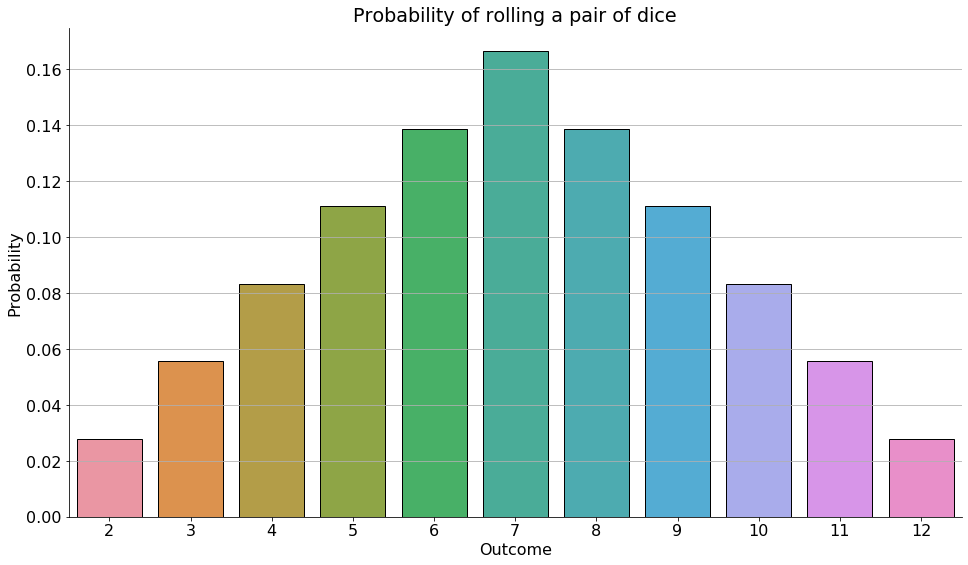

In [293]:
sns.barplot(x=dice_probability.index, y=dice_probability.probability)

print("It's normally distributed!")
plt.title('Probability of rolling a pair of dice')
plt.grid(axis='y')

plt.xlabel('Outcome')
plt.ylabel('Probability');

## 2.
>Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.

In [311]:
# This is a uniform distribution
# Using stats.randint to simulate a six-sided die
# I use stats.randint method because all outcomes from rolling a die (pair of dice) are discrete numbers.
# Each number, 1-6 has an equally likely chance of occurring.

# The `.randint` method is not inclusive so the stop needs to be 1 + max discrete value.
# The `.rvs` method allows us to generate random values from our uniform distribution.
die_1 = stats.randint(1, 7).rvs(size=(10_000, 6)) # Use the shape 10,000, 6 to generate 10,000 trials of 6 rolls
die_2 = stats.randint(1, 7).rvs(size=(10_000, 6)) # repeat for second die
dice = die_1 + die_2                              # add both die together to get a pair of dice.

## 3.
Plot the distribution of the calculated averages. 
> What do you notice about the shape of the distribution of calculated averages?

### Rolling a pair of dice

The average of 6 dice rolls in 10,000 trials is 7.00
It's a Normal Distribution!


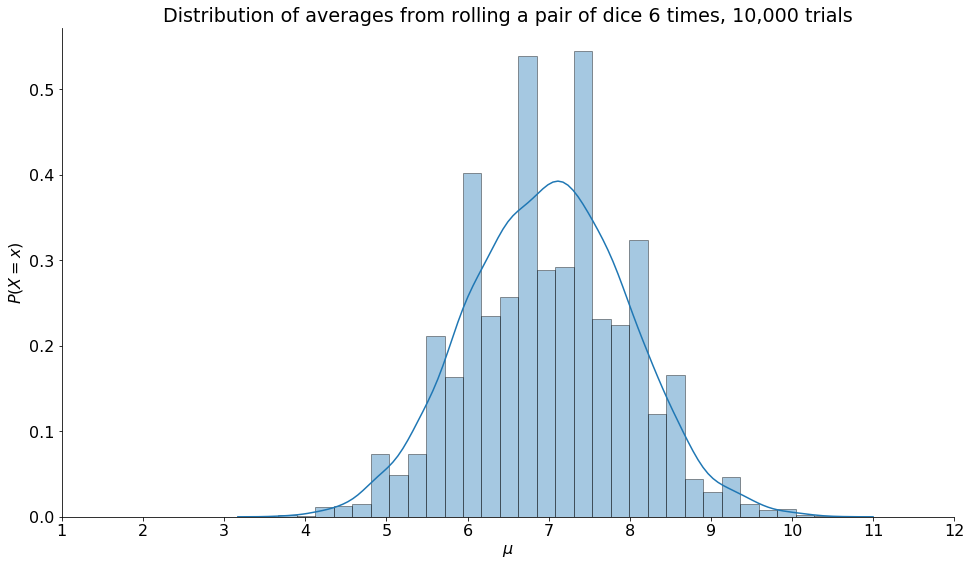

In [323]:
# Calculate the mean of each trial
average = dice.mean(axis=1)

print("The average of 6 dice rolls in 10,000 trials is {:.2f}".format(dice.mean()))
print("It's a Normal Distribution!")

# Plot the means of each trial as distribution
sns.distplot(average, bins=30)

plt.title("Distribution of averages from rolling a pair of dice 6 times, 10,000 trials")
plt.xlabel('$\mu$')
plt.ylabel('$P(X=x)$')
plt.xticks(np.linspace(1, 12, 12));

## Rolling a die
>What kind of distribution is the underlying random variable (i.e. one dice roll?)

Expected average value of 10,000 die rolls 3.5137
A Uniform Distribution!


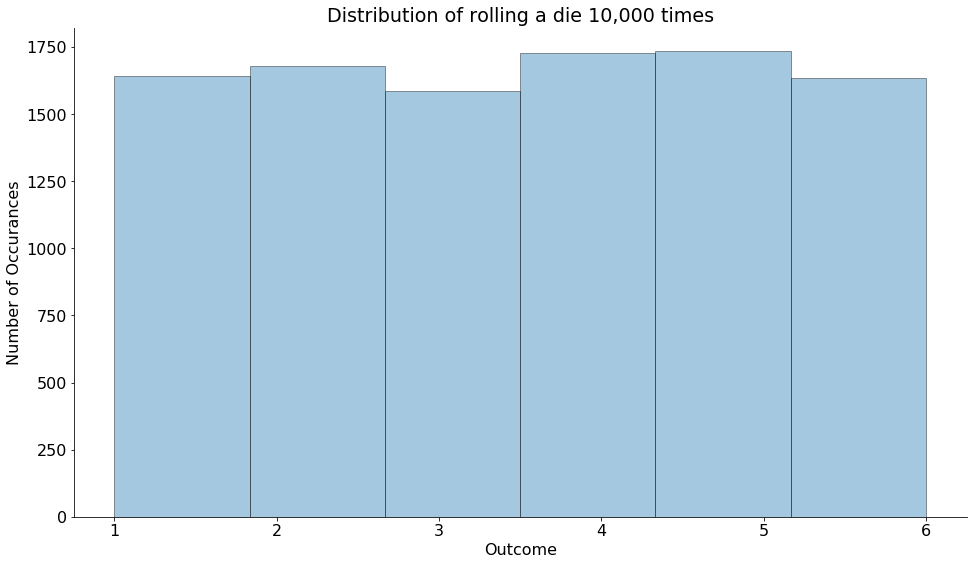

In [328]:
# Create a die using `stats.randint().rvs()`
die_roll = stats.randint(1, 7).rvs(10_000)

# Plot 10,000 dice rolls in a distribution. Set kde=False to remove kernel density estimate.
sns.distplot(die_roll, bins=6, kde=False)

# Chart formatting
print(f"Expected average value of 10,000 die rolls {die_roll.mean()}")
print("A Uniform Distribution!")
plt.title('Distribution of rolling a die 10,000 times')

plt.xlabel('Outcome')
plt.ylabel('Number of Occurances');

__Theory__:

The __Central Limit Theorem__ will be normally distributed even if the underlying random variable is not.



For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like.

> Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## T-Test Exercises

## 1.
Ace Realty wants to determine whether the average time it takes to sell homes is different for _its two offices_.
> A sample of 40 sales from office #1 revealed a `mean` of 90 days and a `standard deviation` of 15 days.

> A sample of 50 sales from office #2 revealed a `mean` of 100 days and a `standard deviation` of 20 days.

> Use a .05 `level of significance`.

__Setup__:


$H{0}$: The average time to sell a home is the same for its two offices.

$H{1}$ The average time to sell a home is significantly different for its two offices.

$\alpha$ = 0.05

In [11]:
alpha = 0.05

o_1sample = 40
o_2sample = 50
o_1mean = 90
o_2mean = 100
o_1stdev = 15
o_2stdev = 20

o_1 = stats.poisson(o_1mean, o_1stdev).rvs(o_1sample)
o_2 = stats.poisson(o_2mean, o_2stdev).rvs(o_2sample)

t, p = stats.ttest_ind(o_1, o_2)
print(t, p)

-8.955894195788018 5.0595788732386865e-14


## 2. 
Load the `mpg` dataset and use it to answer the following questions:

> Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

\$H_{O}$ There is no difference in fuel-efficiency in cars from 2008 v. 1999.

\$H_{1}$ There is a difference in fuel-efficiency in cars from 2008 v. 1999.

In [12]:
from pydataset import data

In [13]:
df_mpg = data('mpg')

In [14]:
df_mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
df_mpg['avg_mpg'] = (df_mpg.cty + df_mpg.hwy)/2
cars_08 = df_mpg[df_mpg.year == 2008].avg_mpg
cars_99 = df_mpg[df_mpg.year == 1999].avg_mpg

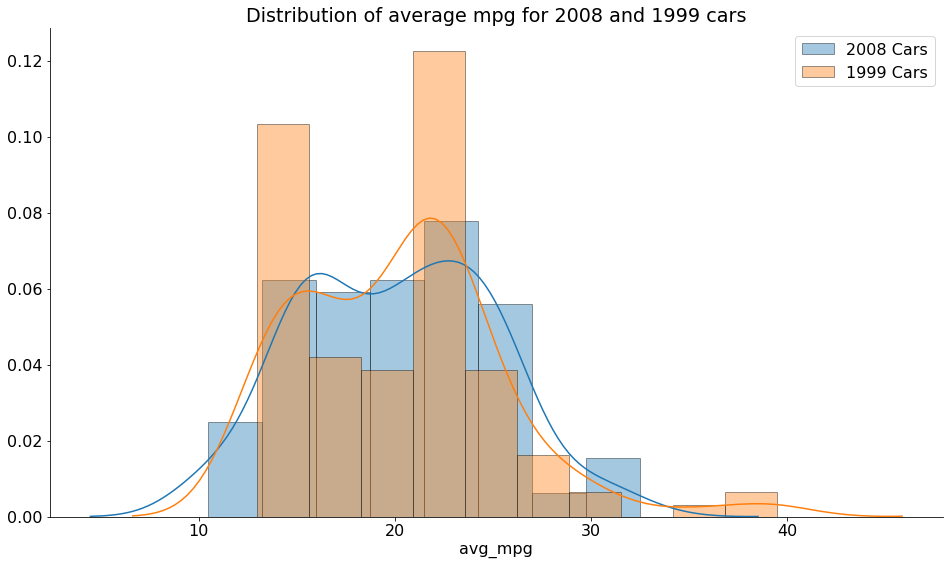

In [21]:
sns.distplot(cars_08, label='2008 Cars')
sns.distplot(cars_99, label='1999 Cars');

plt.title("Distribution of average mpg for 2008 and 1999 cars")
plt.legend();

In [17]:
t, p = stats.ttest_ind(cars_08, cars_99)

In [18]:
print(t, p)

-0.21960177245940962 0.8263744040323578


In [19]:
if p < alpha:
    print('Reject $H_{O}$')
else:
    print('Fail to reject H0')

Fail to reject H0


> Are compact cars more fuel-efficient than the average car?

> Do manual cars get better gas mileage than automatic cars?

## Hypothesis Testing - Without Data

## 1.
https://www.keycdn.com/support/what-is-latency

### Has the network latency gone up since we switched internet service providers?

__Null Hypothesis__: 

> \$H0$ Internet service providers have no effect on network latency.

__Alternative Hypothesis__:

> \$Ha$ Internet service providers effect network latency.

__True Positive__: Internet service providers _do not_ effect network latency.
> Fail to reject the Null Hypothesis

__False Positive__: Internet service providers _do_ effect network latency.
> Reject the Null Hypothesis

__Type I__:

> $\alpha$ Reject \$H0$ when Internet service providers __do not__ effect network latency.

__Type II__: 

> $\beta$ Accept \$H0$ when Internet service providers __do__ effect network latency.

## 2.
### Is the website redesign any good?

__Null Hypothesis__: 
> \$H0$ The website redesign has no effect on the number of daily visitors.

__Alternative Hypothesis__:
> \$Ha$ The website redesign increased the number of daily visitors.

__True Positive__: The website redesign has no effect on the number of daily visitors.
> Fail to reject the Null Hypothesis

__False Positive__: The website redesign increased the number of daily visitors.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H0$ when the website redesign has no effect on the number of daily visitors.

__Type II__: 
> $\beta$ Accept \$H0$ when the website redesign increased the number of daily visitors.

## 3.
### Is our television ad driving more sales?

__Null Hypothesis__: 
> \$H0$ The television ad had no effect on sales this month.

__Alternative Hypothesis__:

> \$Ha$ The television ad increased sales this month.

__True Positive__: The television ad had no effect on sales this month.
> Fail to reject the Null Hypothesis

__False Positive__: The television ad increased sales this month.
> Reject the Null Hypothesis

__Type I__:
> $\alpha$ Reject \$H0$ when the television ad had no effect on sales this month.

__Type II__: 
>$\beta$ Accept \$H0$ when the television ad increased sales this month.

# Correlation

## 1.
Use the `telco_churn` data.

In [25]:
df_telco = pd.read_excel('telco_churn.xlsx')

In [26]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
df_telco.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
# All telco data
tenure = df_telco.tenure
monthly_charge = df_telco.MonthlyCharges
total_charge = df_telco.TotalCharges

In [ ]:
# Internet Only Customers

## 1a.
> Does `tenure` correlate with `monthly charges`?

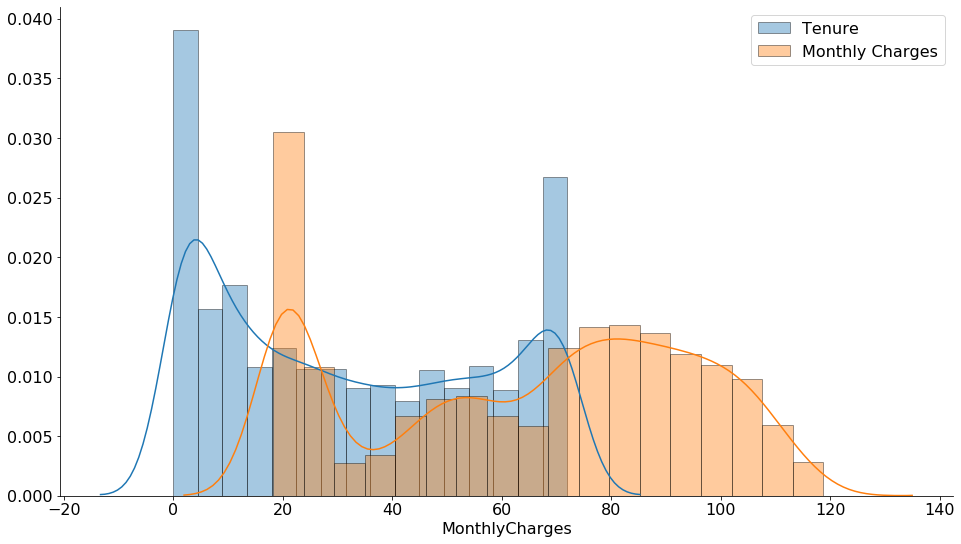

In [28]:
sns.distplot(tenure, label='Tenure')
sns.distplot(m_charge, label='Monthly Charges')
plt.legend();

In [29]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.MonthlyCharges)
print(f"The correlation between tenure and monthly charges is {r}")

The correlation between tenure and monthly charges is 0.24789985628615002


## 1b.
> `Total charges`?

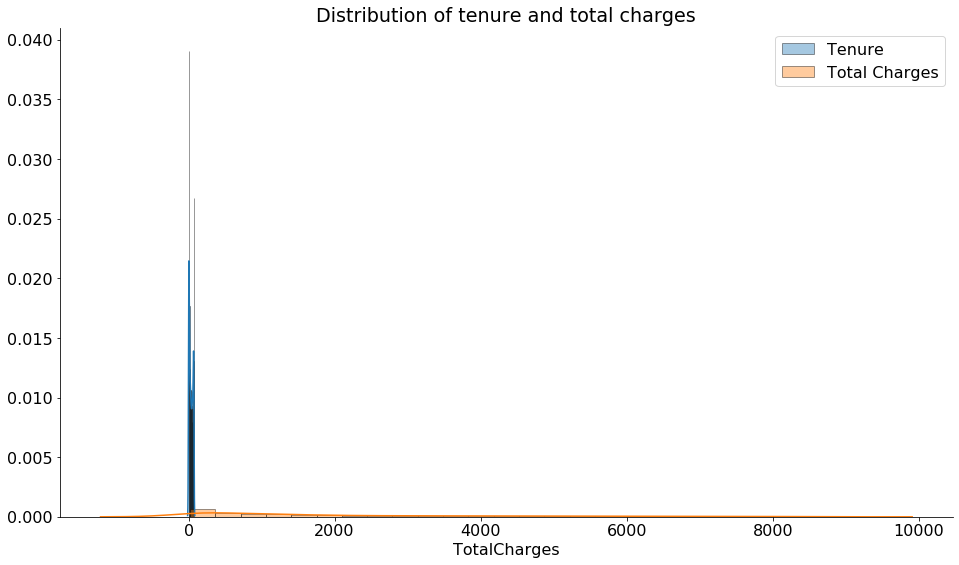

In [37]:
sns.distplot(tenure, label='Tenure')
sns.distplot(t_charge, label='Total Charges')
plt.title("Distribution of tenure and total charges")
plt.legend();

In [110]:
r, p = stats.pearsonr(df_telco.tenure, df_telco.TotalCharges.fillna(0))
print(p)
print(f"The correlation between tenure and total charges is {r}")

0.0
The correlation between tenure and total charges is 0.8261783979502422


## 1c.
> What happens if you __control__ for `phone and internet service`?

### Phone Only

In [122]:
phone_only = df_telco[df_telco['InternetService'] == 'No']

# Phone Only Customers
phone_only_tenure = phone_only.tenure
phone_only_monthly_charge = phone_only.MonthlyCharges
phone_only_total_charge = phone_only.TotalCharges

In [123]:
r, p = stats.pearsonr(phone_only_tenure, phone_only_monthly_charge)

print(p)

print("Correlation between tenure and "\
      "monthly charges for phone only customers is {:.2f}".format(r))

3.356186955197392e-43
Correlation between tenure and monthly charges for phone only customers is 0.34


### Internet Only

In [103]:
internet_only = df_telco[df_telco['PhoneService'] != 'No']

# Internet Only Customers
internet_only_tenure = internet_only.tenure
internet_only_monthly_charge = internet_only.MonthlyCharges
internet_only_total_charge = internet_only.TotalCharges

In [104]:
r, p = stats.pearsonr(internet_only_tenure, internet_only_monthly_charge)

print(p)

print("Correlation between tenure and "\
      "monthly charges for internet only customers is {:.2f}".format(r))

7.117871077967264e-88
Correlation between tenure and monthly charges for internet only customers is 0.25


### Phone and Internet

In [107]:
# Phone and Internet Only Customers
bundled_telco = df_telco[
    (df_telco['PhoneService'] == 'Yes')
    &(df_telco['InternetService'] != 'Yes')
]

bundled_tenure = bundled_telco.tenure
bundled_monthly_charge = bundled_telco.MonthlyCharges
bundled_total_charge = bundled_telco.TotalCharges

In [108]:
r, p = stats.pearsonr(bundled_tenure, bundled_monthly_charge)

print(p)

print("Correlation between tenure and "\
      "monthly charges for phone and internet customers is {:.2f}".format(r))

7.117871077967264e-88
Correlation between tenure and monthly charges for phone and internet customers is 0.25


## 2.
Use the `employees` database.

In [125]:
# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
    
# df_emp_title_salaries = pd.read_sql("""
# select *
# from employees
# join salaries using(emp_no)
# join titles on titles.emp_no = employees.emp_no""",url)

# df_emp_title_salaries.to_csv('employees_salaries.csv')

In [ ]:
['s_from_date', 's_to_date']

In [143]:
columns = list(df_emp_title_salaries.columns[:-2])

> Is there a relationship between how long an employee has been with the company and their `salary`?

## 2a.
> Is there a relationship between how long an employee has been with the company and the number of `titles` they have had?

### 3.
Use the `sleepstudy` data. Is there a relationship between `days` and `reaction time`?

## Chi-Squared Hypothesis Testing

## 1.
> Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

## 2.
> Choose another 2 categorical variables from the `mpg` dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

## 3.
> Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?